Tahap 1 : Pemilihan Dataset dan Eksplorasi Data

In [1]:
import pandas as pd

# Memuat dataset
Uber_df = pd.read_csv('D:\\morti\\uber.csv')

# Menampilkan beberapa baris pertama dataset
print(Uber_df.head())

   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


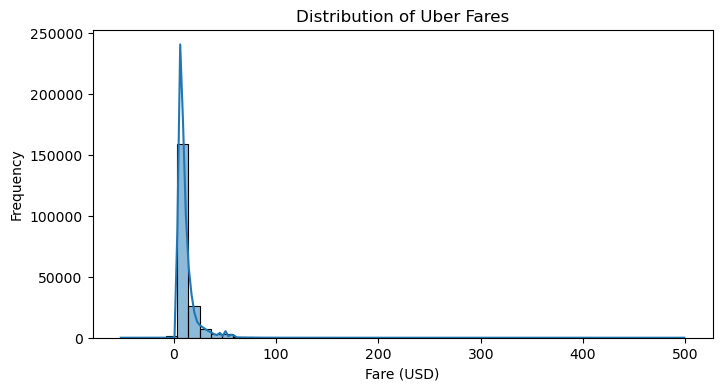

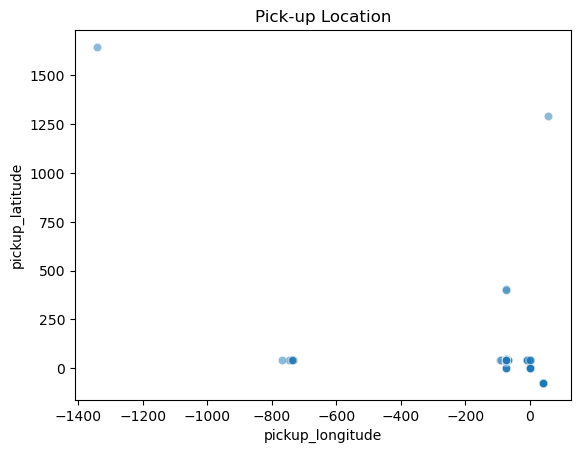

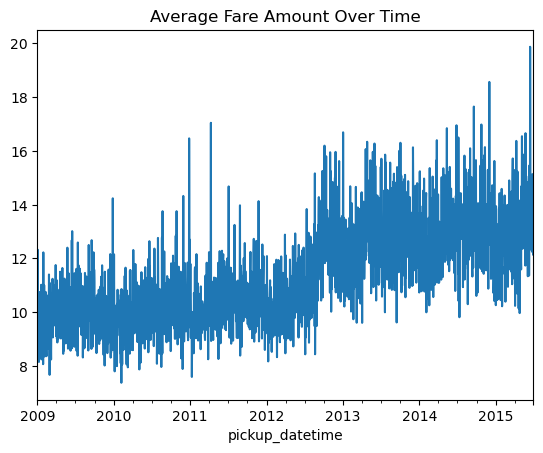

In [2]:
# Analisis Data Eksplorasi (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Distribusi Biaya Perjalanan
plt.figure(figsize=(8, 4))
sns.histplot(Uber_df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Uber Fares')
plt.xlabel('Fare (USD)')
plt.ylabel('Frequency')
plt.show()

# Visualisasi Lokasi Penjemputan
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=Uber_df, alpha=0.5)
plt.title('Pick-up Location')
plt.show()

# Visualisasi Biaya Perjalanan rata-rata Dari Waktu ke Waktu
Uber_df['pickup_datetime'] = pd.to_datetime(Uber_df['pickup_datetime'])
Uber_df.set_index('pickup_datetime', inplace=True)
Uber_df['fare_amount'].resample('D').mean().plot()
plt.title('Average Fare Amount Over Time')
plt.show()


Tahap 2 : Pra-pemrosesan Data

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Mengatasi nilai hilang
Uber_df.dropna(inplace=True)

# Ekstraksi fitur waktu
Uber_df['Hour'] = Uber_df.index.hour
Uber_df['Day_of_Week'] = Uber_df.index.dayofweek

# Menyiapkan fitur dan target variable
features = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'Hour', 'Day_of_Week']
X = Uber_df[features]
y = Uber_df['fare_amount']

# Skalasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


Tahap 3 : Training Model Dan Comparasi Data

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inisialisasi model
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Latih dan evaluasi model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"{name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test, predictions)}")
    print(f"MSE: {mean_squared_error(y_test, predictions)}")
    print(f"RMSE: {mean_squared_error(y_test, predictions, squared=False)}")
    print(f"R²: {r2_score(y_test, predictions)}\n")


Linear Regression Performance:
MAE: 6.033632494085593
MSE: 101.11760956829028
RMSE: 10.055725213443846
R²: 0.0007247055681031123

Decision Tree Performance:
MAE: 3.033843156754749
MSE: 51.30754721728968
RMSE: 7.162928675987894
R²: 0.4929630499472013

Random Forest Performance:
MAE: 2.1949605536659527
MSE: 25.573656217971287
RMSE: 5.057040262640914
R²: 0.7472732696508753



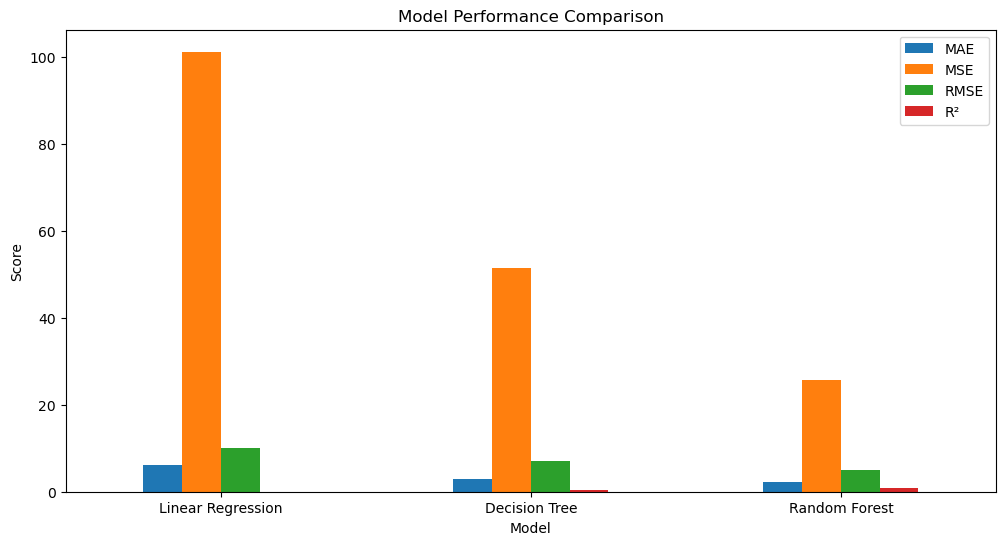

In [5]:
# Perbandingan Kinerja Model
import matplotlib.pyplot as plt
import pandas as pd

performance = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R²': []
}

for name, model in models.items():
    predictions = model.predict(X_test)
    performance['Model'].append(name)
    performance['MAE'].append(mean_absolute_error(y_test, predictions))
    performance['MSE'].append(mean_squared_error(y_test, predictions))
    performance['RMSE'].append(mean_squared_error(y_test, predictions, squared=False))
    performance['R²'].append(r2_score(y_test, predictions))

performance_df = pd.DataFrame(performance)
performance_df.set_index('Model', inplace=True)
performance_df.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()


Tahap 4 : Pemilihan dan Penerapan Model

In [6]:
# Peningkatan Kinerja Model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_predictions = best_model.predict(X_test)

print("Tuned Decision Tree Performance:")
print(f"MAE: {mean_absolute_error(y_test, best_predictions)}")
print(f"MSE: {mean_squared_error(y_test, best_predictions)}")
print(f"RMSE: {mean_squared_error(y_test, best_predictions, squared=False)}")
print(f"R²: {r2_score(y_test, best_predictions)}")


Tuned Decision Tree Performance:
MAE: 2.6168485453908295
MSE: 32.01575794497726
RMSE: 5.658246896785015
R²: 0.683610440520539


In [7]:
# Import Joblib
import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']